In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import yfinance as yf
import tensorflow as tf

## data collection

In [175]:
now=datetime.now()
start=datetime(now.year-5,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)

/var/folders/gw/ljfcvr216xx46wlj_f5mqdzr0000gn/T/ipykernel_3399/1422209621.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


In [176]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-07-09,93.078056,93.627270,92.028220,93.573806,125642800
2020-07-10,93.240875,93.299204,92.059815,92.672216,90257200
2020-07-13,92.810730,97.163170,92.596874,94.548302,191649200
2020-07-14,94.346603,94.538582,91.255423,92.191034,170989200
2020-07-15,94.995430,96.475404,93.794924,96.225097,153198000
...,...,...,...,...,...
2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900
2025-07-02,212.440002,213.339996,208.139999,208.910004,67941800


In [177]:
df.shape

(1255, 5)

In [178]:
df=df.reset_index()

## data  featuring

In [179]:
df['m_100']=df.Close.rolling(100).mean()

In [180]:
df

Price,Date,Close,High,Low,Open,Volume,m_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2020-07-09,93.078056,93.627270,92.028220,93.573806,125642800,NaN
1,2020-07-10,93.240875,93.299204,92.059815,92.672216,90257200,NaN
2,2020-07-13,92.810730,97.163170,92.596874,94.548302,191649200,NaN
3,2020-07-14,94.346603,94.538582,91.255423,92.191034,170989200,NaN
4,2020-07-15,94.995430,96.475404,93.794924,96.225097,153198000,NaN
...,...,...,...,...,...,...,...
1250,2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900,212.249153
1251,2025-07-02,212.440002,213.339996,208.139999,208.910004,67941800,212.046966
1252,2025-07-03,213.550003,214.649994,211.809998,212.149994,34955800,211.911644


In [181]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,m_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2020-07-09,93.078056,93.627270,92.028220,93.573806,125642800,NaN
1,2020-07-10,93.240875,93.299204,92.059815,92.672216,90257200,NaN
2,2020-07-13,92.810730,97.163170,92.596874,94.548302,191649200,NaN
3,2020-07-14,94.346603,94.538582,91.255423,92.191034,170989200,NaN
4,2020-07-15,94.995430,96.475404,93.794924,96.225097,153198000,NaN
...,...,...,...,...,...,...,...
98,2020-11-25,113.187462,113.889824,112.348530,112.719225,76499200,NaN
99,2020-11-27,113.733765,114.611718,113.372834,113.714258,46691300,110.014670
100,2020-11-30,116.133499,118.006461,113.948370,114.104453,169410200,110.245225


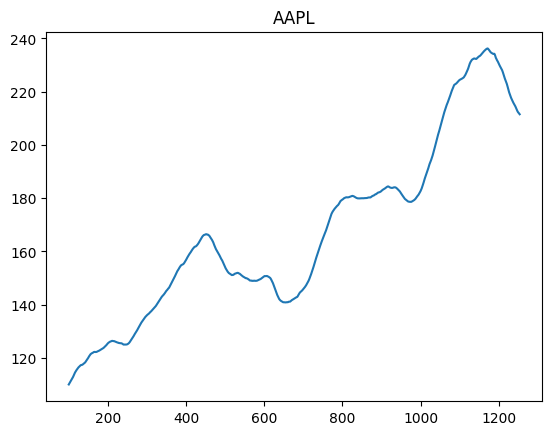

In [182]:
plt.plot(df['m_100']);
plt.title(ticker);

In [183]:
df['percentage changed']=df.Close.pct_change()

In [184]:
df[['Close','percentage changed']]

Price,Close,percentage changed
Ticker,AAPL,
0,93.078056,NaN
1,93.240875,0.001749
2,92.810730,-0.004613
3,94.346603,0.016548
4,94.995430,0.006877
...,...,...
1250,207.820007,0.012916
1251,212.440002,0.022231
1252,213.550003,0.005225


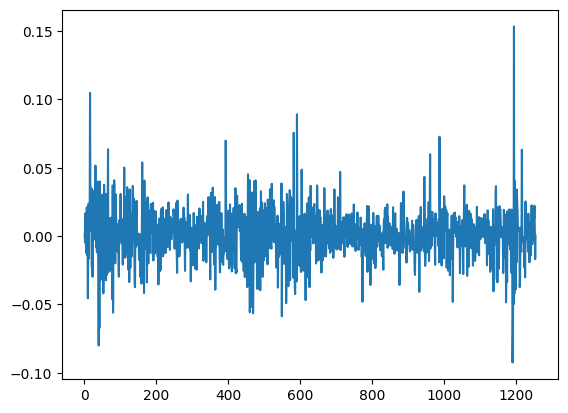

<Figure size 1000x800 with 0 Axes>

In [185]:
plt.plot(df['percentage changed']);
plt.figure(figsize=(10,8));

 ## data preprocessing

In [186]:
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)]);
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)

Ticker        AAPL
0        93.078056
1        93.240875
2        92.810730
3        94.346603
4        94.995430
..             ...
873     191.745834
874     192.172699
875     191.130325
876     184.290405
877     182.910507

[878 rows x 1 columns]


In [187]:
data_testing

Ticker,AAPL
878,180.587540
879,179.862839
880,184.210999
881,183.794052
882,184.836441
...,...
1250,207.820007
1251,212.440002
1252,213.550003
1253,209.949997



##scaling down the data to 0 and 1

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [189]:
data_training_array=scaler.fit_transform(data_training)

In [190]:
data_training_array



array([[0.0285995 ],
       [0.03012628],
       [0.02609272],
       [0.04049492],
       [0.0465791 ],
       [0.03561809],
       [0.03384069],
       [0.0523447 ],
       [0.03997087],
       [0.04245454],
       [0.00209669],
       [0.        ],
       [0.02000826],
       [0.00581124],
       [0.02210474],
       [0.03258727],
       [0.12437814],
       [0.1487844 ],
       [0.1554158 ],
       [0.15903914],
       [0.19404182],
       [0.17043641],
       [0.18518409],
       [0.15457017],
       [0.18776383],
       [0.20602739],
       [0.20509126],
       [0.20235161],
       [0.21107256],
       [0.21239652],
       [0.23584232],
       [0.29150021],
       [0.30508354],
       [0.29565518],
       [0.3111562 ],
       [0.29734444],
       [0.29549543],
       [0.3341452 ],
       [0.38108243],
       [0.35569591],
       [0.2596303 ],
       [0.26036089],
       [0.18602865],
       [0.22712144],
       [0.19214716],
       [0.17854081],
       [0.20922333],
       [0.210

## data Sequence 

In [191]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train= np.array(x_train),np.array(y_train);

In [192]:
import numpy as np

print("NaNs in x_train:", np.isnan(x_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in x_train:", np.isinf(x_train).sum())
print("Infs in y_train:", np.isinf(y_train).sum())

NaNs in x_train: 0
NaNs in y_train: 0
Infs in x_train: 0
Infs in y_train: 0


In [193]:
type(x_train)

numpy.ndarray

In [194]:
x_train.ndim

3

In [195]:
x_train.shape
y_train.shape


(778,)



## model Building

In [196]:
from keras.models import Sequential
from keras.layers import Input ,Dense,LSTM
from tensorflow.keras.optimizers import Adam


In [197]:
model=Sequential();

In [198]:

model=Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))


## model training

In [199]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0704  
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0049
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0028
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0025
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0023
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0023
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0024
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0024
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0020
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0020
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0018
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0019
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0019
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0016
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0017
Ep

In [200]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [201]:
model.save('stock_prediction_portal.keras')

## Data testing

In [202]:
data_testing

Ticker,AAPL
878,180.587540
879,179.862839
880,184.210999
881,183.794052
882,184.836441
...,...
1250,207.820007
1251,212.440002
1252,213.550003
1253,209.949997


In [203]:
data_training

Ticker,AAPL
0,93.078056
1,93.240875
2,92.810730
3,94.346603
4,94.995430
...,...
873,191.745834
874,192.172699
875,191.130325
876,184.290405


In [204]:
previous_100_days=data_training.tail(100)

In [205]:
final_df=pd.concat([previous_100_days,data_testing],ignore_index=True)

In [206]:
final_df

Ticker,AAPL
0,176.265244
1,177.920959
2,175.928177
3,175.055725
4,172.507767
...,...
472,207.820007
473,212.440002
474,213.550003
475,209.949997


In [207]:
input_data=scaler.fit_transform(final_df)

In [208]:
a_test=[]
b_test=[]

for i in range(100,input_data.shape[0]):
    a_test.append(input_data[i-100:i])
    b_test.append(input_data[i,0])

a_test,b_test=np.array(a_test),np.array(b_test)

In [209]:
a_test[0].shape

(100, 1)

## making preditction

In [210]:
b_prediction=model.predict(a_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [211]:
b_prediction

array([[0.23030671],
       [0.20389827],
       [0.1872404 ],
       [0.19947284],
       [0.21064569],
       [0.22200677],
       [0.22562101],
       [0.22725394],
       [0.21677768],
       [0.20391233],
       [0.22284663],
       [0.25380108],
       [0.28516498],
       [0.3086183 ],
       [0.3154192 ],
       [0.31340706],
       [0.3012088 ],
       [0.2894892 ],
       [0.26519495],
       [0.23343004],
       [0.22748858],
       [0.22453535],
       [0.23279871],
       [0.24763511],
       [0.25788715],
       [0.25729817],
       [0.25828478],
       [0.25049278],
       [0.23440479],
       [0.21985278],
       [0.21075849],
       [0.1998546 ],
       [0.19031602],
       [0.18870501],
       [0.1986079 ],
       [0.19860947],
       [0.19068126],
       [0.19081832],
       [0.18704261],
       [0.1811225 ],
       [0.1724971 ],
       [0.14775357],
       [0.11030503],
       [0.08176307],
       [0.06558114],
       [0.06450015],
       [0.07506915],
       [0.086

In [212]:
b_test

array([0.17563878, 0.16796082, 0.21402809, 0.20961069, 0.22065445,
       0.21434366, 0.21781453, 0.19372921, 0.18373706, 0.24631743,
       0.27713402, 0.30163999, 0.31520793, 0.30805586, 0.30458498,
       0.28617916, 0.27892184, 0.24011188, 0.20182781, 0.22770095,
       0.21707833, 0.23632544, 0.25336426, 0.25452111, 0.24305671,
       0.2511655 , 0.23326292, 0.21104237, 0.20166971, 0.19861576,
       0.18229245, 0.17439431, 0.18239786, 0.20398648, 0.18450431,
       0.17018173, 0.18566245, 0.17291996, 0.16586423, 0.15438528,
       0.10636368, 0.05391886, 0.04338773, 0.04212418, 0.06034297,
       0.08161554, 0.08667038, 0.06455523, 0.08424837, 0.08024643,
       0.09183062, 0.116684  , 0.14395956, 0.06708264, 0.07666611,
       0.06160668, 0.04960136, 0.08751296, 0.06824095, 0.0529712 ,
       0.04043902, 0.0489691 , 0.0402287 , 0.04823208, 0.03633217,
       0.04918023, 0.02927628, 0.10573159, 0.12163376, 0.08098377,
       0.04612596, 0.03159322, 0.02148322, 0.        , 0.00884

In [213]:
b_prediction=scaler.inverse_transform(b_prediction.reshape(-1,1)).flatten()
b_test=scaler.inverse_transform(b_test.reshape(-1,1)).flatten()

In [214]:
b_test

array([180.58753967, 179.86283875, 184.21099854, 183.79405212,
       184.83644104, 184.24078369, 184.56838989, 182.29504395,
       181.35191345, 187.25869751, 190.16738892, 192.48043823,
       193.76107788, 193.08601379, 192.75840759, 191.02113342,
       190.33613586, 186.67297363, 183.05944824, 185.50154114,
       184.49890137, 186.31558228, 187.92382812, 188.03302002,
       186.95092773, 187.71629333, 186.02651978, 183.92918396,
       183.04452515, 182.75627136, 181.21556091, 180.47007751,
       181.22550964, 183.26319885, 181.42433167, 180.07246399,
       181.53364563, 180.33091736, 179.66494751, 178.58148193,
       174.04885864, 169.09873962, 168.10473633, 167.98547363,
       169.70509338, 171.71295166, 172.19006348, 170.10267639,
       171.9614563 , 171.58372498, 172.67712402, 175.02296448,
       177.59742737, 170.3412323 , 171.24578857, 169.82437134,
       168.69122314, 172.26959229, 170.45056152, 169.0092926 ,
       167.82641602, 168.63154602, 167.80656433, 168.56

In [215]:
b_prediction

array([185.74748, 183.25487, 181.68259, 182.83717, 183.89174, 184.96408,
       185.30522, 185.45935, 184.47054, 183.2562 , 185.04337, 187.96506,
       190.92542, 193.1391 , 193.781  , 193.59111, 192.43974, 191.33356,
       189.0405 , 186.0423 , 185.48149, 185.20276, 185.98271, 187.38307,
       188.35074, 188.29514, 188.38826, 187.65279, 186.1343 , 184.76077,
       183.90239, 182.8732 , 181.97289, 181.82083, 182.75552, 182.75568,
       182.00735, 182.0203 , 181.66393, 181.10513, 180.291  , 177.95554,
       174.42087, 171.72688, 170.19951, 170.09747, 171.09505, 172.21844,
       172.25261, 172.63841, 172.80977, 173.22966, 174.38293, 176.23956,
       174.8564 , 173.56416, 172.24582, 171.01913, 171.51161, 171.63861,
       171.15958, 170.31142, 169.9472 , 169.55595, 169.5522 , 169.27856,
       169.43526, 169.0254 , 171.02983, 173.54741, 173.93272, 172.44698,
       170.56044, 168.92532, 167.27312, 166.4674 , 166.49802, 167.43752,
       168.62389, 169.30157, 171.00781, 171.31567, 

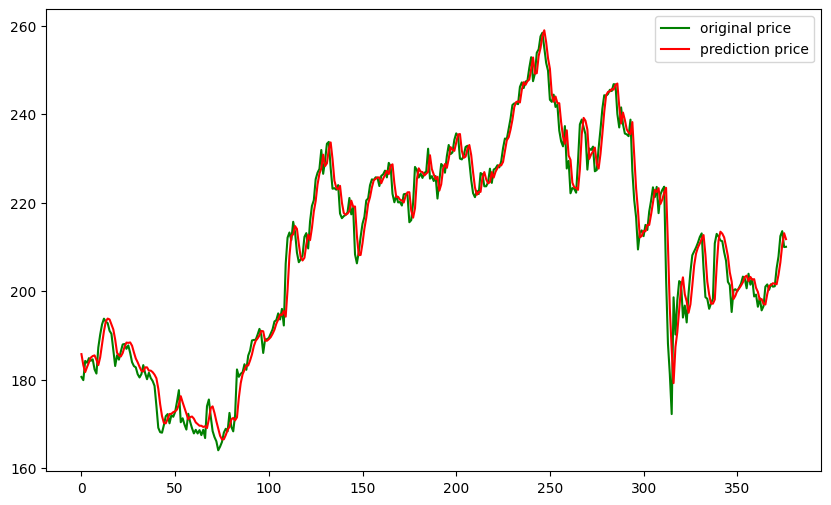

In [216]:
plt.figure(figsize=(10,6));
plt.plot(b_test,'g',label='original price')
plt.plot(b_prediction,'r',label='prediction price')
plt.legend()

In [217]:
from sklearn.metrics import mean_squared_error

In [220]:
mse=mean_squared_error(b_test,b_prediction)
print(f"Mean Squared Error(Mse):{mse}")

Mean Squared Error(Mse):17.604866154481396
